<a href="https://colab.research.google.com/github/valesierrai/Aprendizaje-No-Supervisado-para-el-AD/blob/main/Reto1_VSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Se cargan Librerias

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

1. Se suben los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path= "/content/drive/MyDrive/Colab Notebooks/Aprendizaje No Supervisado/marketing_campaign.csv"
data= pd.read_csv(path,sep="\t")
data= data.dropna()

Mounted at /content/drive


2. Se organizan los Datos

*2.1. Punto 1*

In [ ]:
#Se organiza el total de personas que aceptaron campañas
data["Numcmp"] = data['AcceptedCmp1']+ data['AcceptedCmp2']+ data['AcceptedCmp3']+ data['AcceptedCmp4']+ data['AcceptedCmp5'] +data['Response']
data["Numcmp"]

data["Numcmp"].value_counts()

data["AcceptedCampaigns"]=np.where(data["Numcmp"]!=0, "Si","No")
data["AcceptedCampaigns"]

0       Si
1       No
2       No
3       No
4       No
        ..
2235    No
2236    Si
2237    Si
2238    No
2239    Si
Name: AcceptedCampaigns, Length: 2216, dtype: object

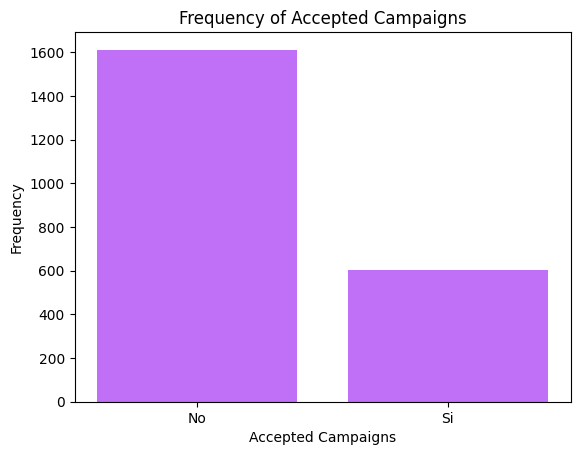

In [ ]:
tabla_frecuencia= data["AcceptedCampaigns"].value_counts( )
plt.bar(x=tabla_frecuencia.index,height =tabla_frecuencia, color= "#C070F6" )
plt.xlabel("Accepted Campaigns")
plt.ylabel("Frequency")
plt.title("Frequency of Accepted Campaigns")
plt.show()

In [ ]:
#Se organizan el número de hijos
data['NumChild']= data['Kidhome']+data['Teenhome']
data['NumChild']

data['NumChild'].value_counts()

data['Children']= np.where(data['NumChild']==0, "No", "Si")
data['Children']

0       No
1       Si
2       No
3       Si
4       Si
        ..
2235    Si
2236    Si
2237    No
2238    Si
2239    Si
Name: Children, Length: 2216, dtype: object

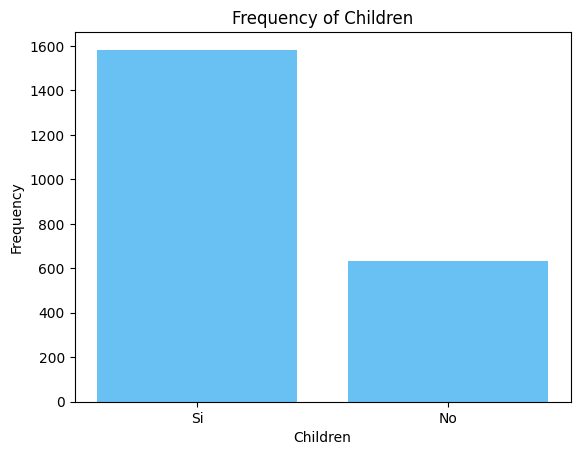

In [ ]:
tabla_frecuencia= data["Children"].value_counts( )
plt.bar(x=tabla_frecuencia.index,height =tabla_frecuencia, color= "#68C0F3" )
plt.xlabel("Children")
plt.ylabel("Frequency")
plt.title("Frequency of Children")
plt.show()

*2.2. Punto 2*

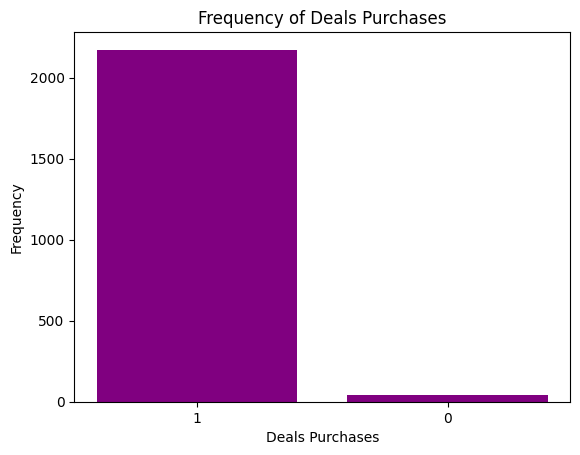

In [ ]:
data["NumDealsPurchases"].value_counts()

data['DealsPurchases']= np.where(data['NumDealsPurchases']==0, "0", "1")
data['DealsPurchases']

tabla_frecuencia= data["DealsPurchases"].value_counts( )
plt.bar(x=tabla_frecuencia.index,height =tabla_frecuencia, color= "purple")
plt.xlabel("Deals Purchases")
plt.ylabel("Frequency")
plt.title("Frequency of Deals Purchases")
plt.show()

In [ ]:
data[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].value_counts()

NumWebPurchases  NumCatalogPurchases  NumStorePurchases
1                0                    3                    146
2                0                    3                    118
1                0                    2                     90
3                0                    3                     52
2                0                    4                     51
                                                          ... 
5                9                    11                     1
                                      4                      1
                 8                    12                     1
                                      10                     1
27               0                    0                      1
Name: count, Length: 597, dtype: int64

3. Se realizan los Gráficos

*3.1. Punto 1*

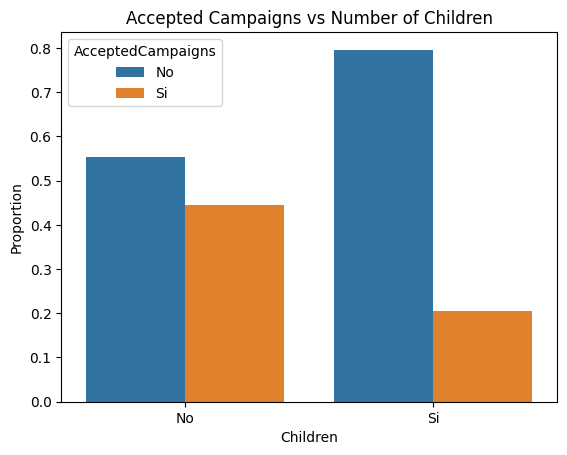

In [ ]:
#Tabla de Frecuencia de el número de hijos y las campañas aceptadas
tabla_frecuencia= data.groupby('Children')['AcceptedCampaigns'].value_counts(normalize=True)
sns.barplot(data=tabla_frecuencia.reset_index(), x='Children', y='proportion', hue='AcceptedCampaigns')
plt.xlabel("Children")
plt.ylabel("Proportion")
plt.title("Accepted Campaigns vs Number of Children")
plt.show()

*3.2. Punto 2*

<ipython-input-16-07c5b0d737c7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x="NumWebPurchases", y="DealsPurchases",palette="dark:blue"  )


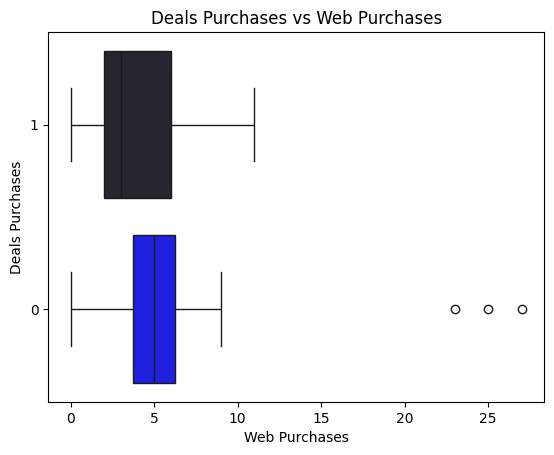

In [ ]:
#Gráfico Box Plot entre el número de compras con descuento y las realizadas por la web
sns.boxplot(data=data,x="NumWebPurchases", y="DealsPurchases",palette="dark:blue"  )
plt.xlabel("Web Purchases")
plt.ylabel("Deals Purchases")
plt.title("Deals Purchases vs Web Purchases")
plt.show()

<ipython-input-17-86dc03632bcb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x="NumCatalogPurchases", y="DealsPurchases",palette="dark:red"  )


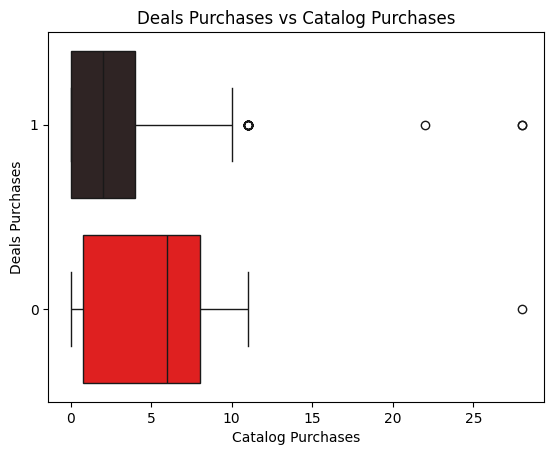

In [ ]:
#Gráfico Box Plot entre el número de compras con descuento y las realizadas por catálogo
sns.boxplot(data=data,x="NumCatalogPurchases", y="DealsPurchases",palette="dark:red"  )
plt.xlabel("Catalog Purchases")
plt.ylabel("Deals Purchases")
plt.title("Deals Purchases vs Catalog Purchases")
plt.show()

<ipython-input-18-987903b27a17>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x="NumStorePurchases", y="DealsPurchases",palette="dark:yellow" )


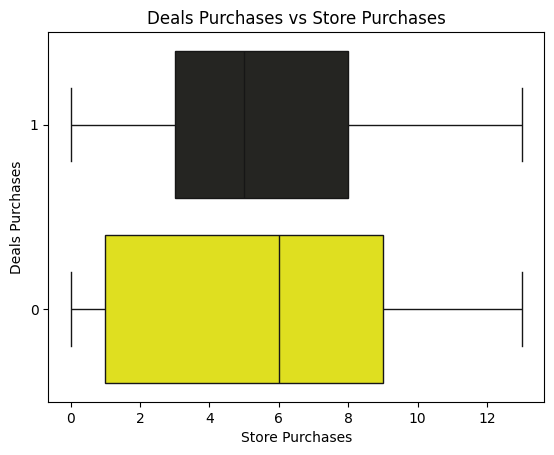

In [ ]:
#Gráfico Box Plot entre el número de compras con descuento y las realizadas en la tienda
sns.boxplot(data=data,x="NumStorePurchases", y="DealsPurchases",palette="dark:yellow" )
plt.xlabel("Store Purchases")
plt.ylabel("Deals Purchases")
plt.title("Deals Purchases vs Store Purchases")
plt.show()

**4. Análisis de Resultado**

Después de ejecutado las gráficas, en primer lugar para el caso del número de hijos y las campañas de promoción aceptadas se puede decir que tanto los clientes con hijos como los que no tienen, muestran una preferencia por no aceptar este tipo de campañas, puesto que en el gráfico se ve que las barras correspondientes (azules) son superiores a las que muestran si el cliente aceptó la campaña (naranja). Asimismo, es posible identificar que las personas sin hijos muestran una inclinación por las campañas promocionales ya que tienen una proporción de un poco más de 0.4, mientras que los clientes con hijos apenas alcanzan una de 0.2. Por ende, se podría concluir que  las campañas promocionales no están siendo llamativas para los clientes en general, pero en especial los que tienen hijos, por lo tanto si se quiere incrementar el interés de estas, se tendría que replantear el tipo de campañas que se están utilizando y así hacerlas más acorde a las compras que realizan los clientes con hijos.

Por otro lado, se analizó a los clientes que hacen compras con descuento en cada una de las opciones posibles (Página Web, Catalogo y Tiendas Físicas). En donde se encontró que la media de los compradores por la web es menor a las 5 compras (3 aprox), mientras que por catalogo es un poco mayor a 0 (2 aprox), y en tiendas físicas es de 5 compras aproximadamente. Con base a esto, teniendo en cuenta el 50% de las personas en cada una de las opciones posibles, se puede concluir que en las tiendas físicas hay más clientes que realizaron compras con descuento.  